Author: Velibor Zeli

This document is released under a common license, allowing for broad usage and distribution.

# Fair-Price Models for Amortized Loans

Fair-price models for amortized loans quantify the **relationship between the cost of borrowing and interest rates**. As interest rates increase, it becomes more difficult to service the interest and repay a mortgage. Consequently, all else being equal, borrowers take out loans with a smaller principal to compensate for higher interest rates. This, in turn, can have an impact on the housing market, potentially leading to lower housing prices.

### Motivation

Amortized loans are a popular debt instrument widely used to finance housing purchases. These loans provide liquidity to the housing market, and abundance of cheap capital with low interest rates has resulted in higher housing costs.

Consider the following figure

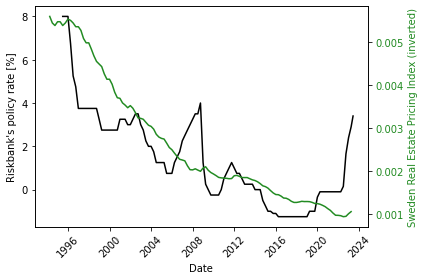

In [1]:
from src.plotting import plot_interest_rate_vs_home_prices

plot_interest_rate_vs_home_prices()

Assuming a causal relationship between these factors, the above figures shows that lower interest rates provide access to cheap capital and lead to an increase in housing prices. Therefore, it is reasonable to expect that increasing interest rates would have the opposite effect on the housing prices.

After maintaining a loose interest rate policy with negative policy rate (Swe., styrräntan) since 2015, Riksbanken shifted its stance and began aggressively increasing the policy rate in early 2022. This decision directly impacted STIBOR as well as the interest rates charged by banks for amortized loans.

---

### Matching-Times Model

The total cost of borrowing, denoted by $\Sigma$, for an amortized loan is defined as

$$ \Sigma = A \, T, \qquad (1) $$

where $T$ is the duration of the loan in months, and $A$ is the fixed monthly payment that consists of interest rate payment and amortization. Monthly payment is calculated based on the loan contract parameters as

$$ A = p \frac{r}{1 - \left( \frac{1}{1 + r} \right)^T}, \qquad (2a)$$

where $p$ is the loan principal, $r$ is the monthly interest rate.

Solving $(2a)$ for the loan term gives

$$ T = \frac{\ln\left(1 - r \frac{p}{A} \right)}{\ln\left( \frac{1}{1+r} \right)}. \qquad (2b) $$

We introduce two key terms that are used in determining the repayment duration for housing:

* $\Sigma$ - total cost of borrowing, encompassing the principal amount borrowed and the associated interest

* $\sigma$ - portion of income allocated towards housing expenses

Together, these terms establish the time scale $t$, which represents the number of years required to fully repay the initial principal and interest for housing. Mathematically, we express this relationship as:

Together, these terms establish the time scale $t$, which represents the number of years required to fully repay the initial principal and interest for housing

$$ \frac{\Sigma}{\sigma} \equiv t. \qquad (3a) $$

Depending on the location of the housing, borrowers with mortgages may exhibit different values of $ t $. $(3a)$ implies that $t$ is equivalent to the loan duration $T$ and leads to:

$$ \frac{\Sigma}{\sigma} = T. \qquad (3b) $$

>_There exists a time scale $T$ that represents the duration required to pay off a mortgage. Depending on the location of the housing, borrowers with mortgages may exhibit different values of $T$. Equation $(3b)$ implies that $T$ is influenced by a delicate balance between various markets: the labor market, the financial market, and the housing market. Specifically, $T$ is shaped by factors such as monthly income in the labor market, prevailing interest rates in the financial market, and the initial loan principal in the housing market. These interconnected market dynamics contribute to the determination of $T$, reflecting the complexity involved in the repayment process._

This means that we can equate

$$ T_1 = T_2, $$

implying that homebuyers repay their homes after the same amount of time under different economic circumstances. By substituting $(2b)$ into the above equality, we can solve for $p_2$

$$ p_2 = \frac{A_2}{r_2} \left[ 1 - \left( 1 - r_1 \frac{p_1}{A_1} \right)^{ \frac{\ln\left( \frac{1}{1 + r_2} \right)}{\ln\left( \frac{1}{1 + r_1} \right)} } \right]. \qquad (4) $$

Finally, the only unknown is $A$, which can be determined by substituting (1) into (3b)

$$ A = \sigma .$$

Here, $\sigma$ represents the monthly portion of income allocated for housing and is modelled as

$$ A = \sigma = \frac{s (1 - \tau) \,}{12} \delta, \qquad (5) $$

where $s$ denotes the annual bruto income, $\tau$ represents the income tax rate, and $\delta$ indicates the fraction of $s$ allocated for housing.

---

#### Example 1

Consider an economy with an income tax rate of 30%. A borrower with an annual bruto income of 500,000 SEK intends to borrow 2,000,000 SEK at an annaul interest rate of 1.5% and is willing to allocate 50% of her income to service the loan. She anticipates a change in the annual interest rate to 4.8% in 1.5 years. Meanwhile, her annual salary has increased by 2% and money markets offered a flat continuously-compounded annual interest rate of 0.75%. She seeks to determine the equivalent principal $p_2$ for the previous loan under the new circumstances.

Parameters for the loan at $t_1$:

* `tau = 0.30`
* `p1 = 2_000_000`
* `r1 = 0.015`
* `s1 = 500_000`
* `delta = 0.50`
* `r2 = 0.048`
* `gamma = 0.02`
* `s2 = 500_000 * (1 + gamma)`
* `rf = 0.0075`
* `dt = 1.5`

In [2]:
gamma, tau, delta = 0.02, 0.30, 0.50
p1, r1, s1 = 2_000_000, 0.015, 500_000
r2, s2 = 0.0480, 500_000 * (1 + 0.02)
rf, dt = 0.0075, 1.5

In [3]:
A1 = s1 * (1 - tau) * delta / 12
print(f"Monthly payment at t1: {round(A1, -2):,.2f} SEK")

Monthly payment at t1: 14,600.00 SEK


In [4]:
A2 = s1 * (1 + 0.02) * (1 - tau) * delta / 12
print(f"Monthly payment at t2: {round(A2, -2):,.2f} SEK")

Monthly payment at t2: 14,900.00 SEK


In [5]:
import numpy as np

from src.fair_price_model import equivalent_principal_matching_T

p2 = equivalent_principal_matching_T(p1, s1, r1, r2, tau, delta, gamma) * np.exp(-rf * dt)
print(f"Discounted equivalent principal: {p2:,.2f} SEK")

Discounted equivalent principal: 1,660,986.91 SEK


In [6]:
print(f"Discounted equivalent principal: {(p2 - p1)/p1:.2%} SEK")

Discounted equivalent principal: -16.95% SEK


---

#### Example 2

For the parameters given in **Example 1** calculate the relative change of discounted equivalent principal $p_2$ compared to $p_1$ for a range of borrowers with different loan sizes $\rho = p_1/s_1 \in [2, 4.5]$ and fractions allocated to repaying the debt $\delta \in [0.3, 1]$.

In [7]:
%%capture
import numpy as np

from src.plotting import plot_matching_T

gamma, tau, deltas = 0.02, 0.30, np.arange(0.3, 1.01, 0.01)
p1, r1, rhos = 2_000_000, 0.015, np.arange(2, 4.5, 0.05)
r2, s2 = 0.0480, 500_000 * (1 + 0.02)
rf, dt = 0.0025, 1.5

plot_matching_T(p1, rhos, r1, r2, tau, deltas, gamma, rf, dt)